### Author: Uday Routhu

### assingment: Describing Distributions (Core)

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
df = pd.read_csv('Data/medical.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

In [14]:
# Calculate the skewness
def find_skew(col):
    column_name=col
    column_data = df[column_name]
    skewness = stats.skew(column_data)
    if skewness > 0:
        print(f"The {column_name} column is positively skewed.")
    elif skewness < 0:
        print(f"The {column_name} column is negatively skewed.")
    else:
        print(f"The {column_name} column is approximately symmetric (not skewed).")
    print(f"Skewness value for {column_name}: {skewness}")

In [22]:
def plot_custom_histogram(data, col_name):
    # Calculate statistics
    mean = data.mean()
    median = data.median()
    std = data.std()
    plus_one_std = mean + std
    minus_one_std = mean - std
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the histogram with KDE
    sns.histplot(data, ax=ax, kde=True)
    
    # Add lines for mean, median, +1 std, -1 std
    ax.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
    ax.axvline(plus_one_std, color='black', linestyle='--', label=f'+1 Std: {plus_one_std:.2f}')
    ax.axvline(minus_one_std, color='black', linestyle='--', label=f'-1 Std: {minus_one_std:.2f}')
    
    # Highlight the range between +1 and -1 std
    ax.axvspan(minus_one_std, plus_one_std, alpha=0.2, color='yellow', label='Range: ±1 Std')
    
    # Set plot title and labels
    ax.set_title(f'Distribution of {col_name}')
    ax.set_xlabel(col_name)
    ax.set_ylabel('Density')
    
    # Add a legend
    ax.legend()
    
    # Show the plot
    plt.show()

### The features to analyze 

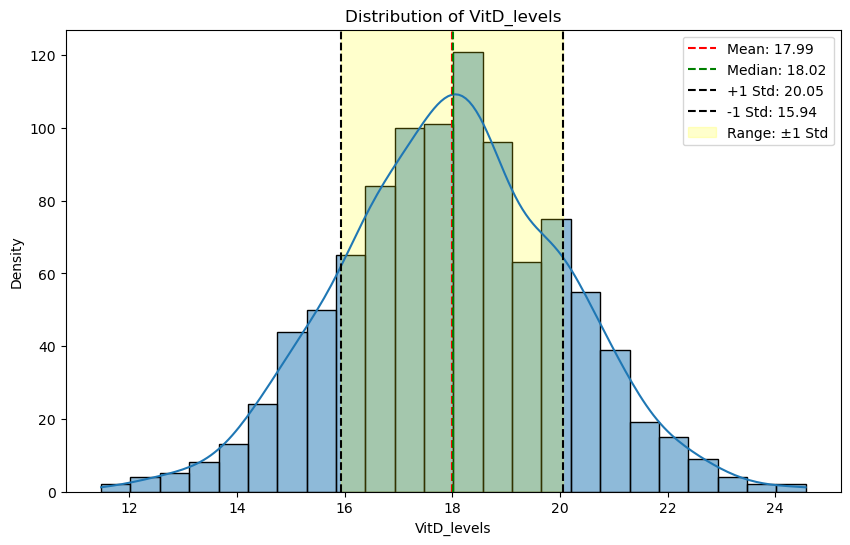

In [23]:
plot_custom_histogram(df['VitD_levels'], 'VitD_levels')

#### Answer the following questions

#### Is it Discrete or Continuous?

Ans: The range from +1 standard deviation (20.05) to -1 standard deviation (15.94) covers a reasonable range of values around the mean.

Continuous Variable

#### Does it have a skew? If so, which direction (+/-)

Ans: 
Mean (17.99) is slightly less than the median (18.02).

The value at +1 standard deviation (20.05) is farther from the mean than the value at -1 standard deviation (15.94).
In a positively skewed distribution

#### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

In [12]:
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
kurt

3.013147515833447

Ans: The kurtosis value of 3.013147515833447 suggests that the data has positive excess kurtosis, 

which means it is leptokurtic

#### For each feature listed

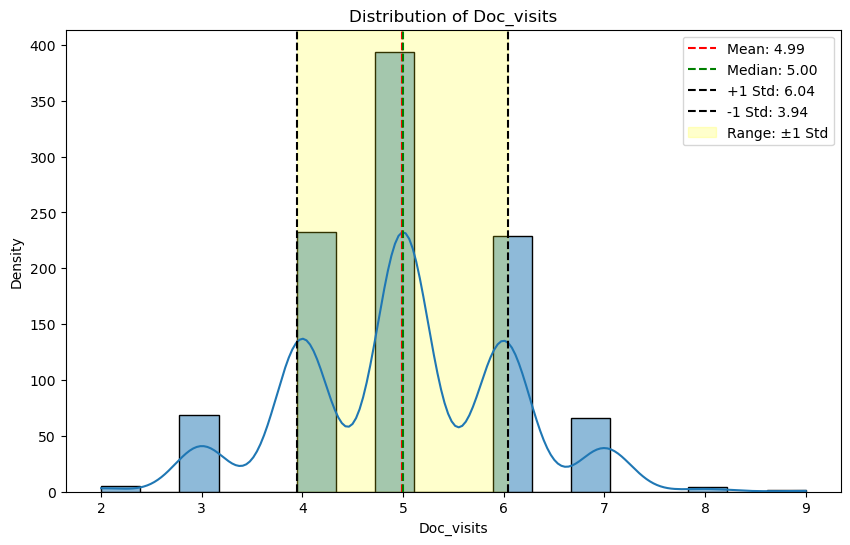

In [24]:
plot_custom_histogram(df['Doc_visits'], 'Doc_visits')

#### Answer the following questions

#### Is it Discrete or Continuous?

Ans: This suggests that the variable likely represents a continuous quantity, as it can take on a range of values with decimal points (e.g., 4.99, 5.00, 6.04).

#### Does it have a skew? If so, which direction (+/-)

Ans: Since the mean is very close to the median (5.00), it suggests that the data is approximately symmetric and does not have a significant skew in either direction. Additionally, the values within one standard deviation of the mean (3.94 to 6.04) also support this observation. Therefore, the data appears to be relatively symmetric and not skewed in either direction.

#### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

In [16]:
kurt = stats.kurtosis(df['Doc_visits'], fisher = False)
kurt

2.9919958083381206

Ans: mesokurtic

the data distribution is mesokurtic, which indicates that it doesn't have particularly heavy tails (leptokurtic) or light tails (platykurtic) compared to a normal distribution.

#### For each feature listed:

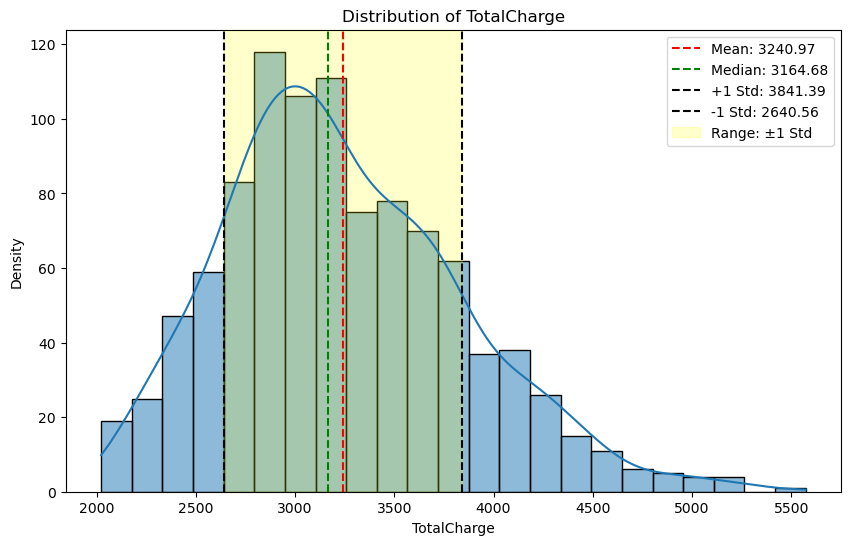

In [25]:
plot_custom_histogram(df['TotalCharge'], 'TotalCharge')

#### Answer the following questions

#### Is it Discrete or Continuous?

Ans: "TotalCharge" is likely a continuous variable. 
It's because charges can vary continuously and be measured with precision, including decimal values.

#### Does it have a skew? If so, which direction (+/-)

If Mean > Median: Positive Skew (Right-Skewed)
If Mean < Median: Negative Skew (Left-Skewed)

In my case, Mean (3240.97) is greater than Median (3164.68), which indicates a slight positive skew.

Ans: The TotalCharge column is positively skewed

#### What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)


In [17]:
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)
kurt

3.2650077463439384

Ans: kurtosis value of 3.2650077463439384 indicates leptokurtic kurtosis. 

Leptokurtic distributions have fatter tails and a sharper peak than a normal distribution.